In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from tabulate import tabulate
from pymcdm import methods as mcdm_methods
from pymcdm import normalizations as norm
import seaborn as sns
%matplotlib inline

# Przetworzenie danych

In [65]:
# importing data

dfKult = pd.read_csv('KULT_3881_CTAB_20220211231432.csv', sep=';')
dfLudn = pd.read_csv('LUDN_2425_CTAB_20220211224427.csv', sep=';')
dfTran = pd.read_csv('TRAN_3164_CTAB_20220211231704.csv', sep=';')
dfTury = pd.read_csv('TURY_3186_CTAB_20220211230207.csv', sep=';')
dfWyna = pd.read_csv('WYNA_2497_CTAB_20220211225034.csv', sep=';')

dfKult.fillna(0)
dfLudn.fillna(0)
dfTran.fillna(0)
dfTury.fillna(0)
dfWyna.fillna(0)



,Kod,Nazwa,ogółem;2020;[zł],Unnamed: 3
0,201000,Powiat bolesławiecki,"4887,95",0.0
1,202000,Powiat dzierżoniowski,"4690,20",0.0
2,203000,Powiat głogowski,"4763,21",0.0
3,204000,Powiat górowski,"4432,40",0.0
4,205000,Powiat jaworski,"4932,98",0.0
...,...,...,...,...
375,3217000,Powiat wałecki,"4678,73",0.0
376,3218000,Powiat łobeski,"4713,45",0.0
377,3261000,Powiat m.Koszalin,"4973,23",0.0
378,3262000,Powiat m.Szczecin,"5695,84",0.0


In [66]:
# changing the names of the columns to be more readable

dfLudn = dfLudn.rename(columns = {'ludność na 1 km2;2020;[osoba]': 'Ludność na 1 km2'}, inplace = False)
dfTran = dfTran.rename(columns = {'ścieżki rowerowe (drogi dla rowerów) ogółem;2020;[km]': 'Ścieżki rowerowe'}, inplace = False)
dfTury = dfTury.rename(columns = {'ogółem;obiekty ogółem;2019;[ob.]': 'Turystyczne obiekty noclegowe'}, inplace = False)
dfWyna = dfWyna.rename(columns = {'ogółem;2020;[zł]': 'Przeciętne wynagrodzenie'}, inplace = False)

# convert commas to dots to enable format to float

dfTran = dfTran.stack().str.replace(',','.').unstack()
dfWyna = dfWyna.stack().str.replace(',','.').unstack()

dfWyna['Przeciętne wynagrodzenie'] = dfWyna['Przeciętne wynagrodzenie'].astype(float)
dfTran['Ścieżki rowerowe'] = dfTran['Ścieżki rowerowe'].astype(float)

dfWyna

,Kod,Nazwa,Przeciętne wynagrodzenie
0,NaN,Powiat bolesławiecki,4887.95
1,NaN,Powiat dzierżoniowski,4690.20
2,NaN,Powiat głogowski,4763.21
3,NaN,Powiat górowski,4432.40
4,NaN,Powiat jaworski,4932.98
...,...,...,...
375,NaN,Powiat wałecki,4678.73
376,NaN,Powiat łobeski,4713.45
377,NaN,Powiat m.Koszalin,4973.23
378,NaN,Powiat m.Szczecin,5695.84


In [67]:
dfKult = dfKult.drop(labels=['Kod', 'Unnamed: 7'], axis='columns')
dfKult = dfKult.set_index('Nazwa')
dfKult

,stadiony;ogółem;2018;[ob.],hale sportowe o wymiarach od 36x19 m;ogółem;2018;[ob.],sale gimnastyczne o wymiarach poniżej 36x19 m i sale pomocnicze;ogółem;2018;[ob.],korty tenisowe;ogółem;2018;[ob.],pływalnie kryte;ogółem;2018;[ob.]
Nazwa,,,,,
Powiat bolesławiecki,23,1,0,3,2
Powiat dzierżoniowski,6,4,3,16,1
Powiat głogowski,3,2,0,5,2
Powiat górowski,3,2,1,2,1
Powiat jaworski,2,0,0,1,1
...,...,...,...,...,...
Powiat wałecki,6,3,5,7,1
Powiat łobeski,3,2,0,8,0
Powiat m.Koszalin,3,7,3,13,2


In [68]:
# calculating the average number of sports facilities as a measure of the county's sports activity

dfKult['Średnia ilość obiektów'] = dfKult.mean(axis=1)
dfKult = dfKult.filter(['Średnia ilość obiektów'])
dfKult = dfKult.reset_index()
dfKult


,Nazwa,Średnia ilość obiektów
0,Powiat bolesławiecki,5.8
1,Powiat dzierżoniowski,6.0
2,Powiat głogowski,2.4
3,Powiat górowski,1.8
4,Powiat jaworski,0.8
...,...,...
375,Powiat wałecki,4.4
376,Powiat łobeski,2.6
377,Powiat m.Koszalin,5.6
378,Powiat m.Szczecin,7.0


In [69]:
# combining a table with data into one

df_merged = pd.merge(dfKult, dfLudn, on=("Nazwa"), how="inner")  
df_merged = pd.merge(df_merged, dfTran, on=("Nazwa"), how="inner")  
df_merged = pd.merge(df_merged, dfWyna, on=("Nazwa"), how="inner")  
df_merged = pd.merge(df_merged, dfTury, on=("Nazwa"), how="inner")  

df_merged = df_merged.drop_duplicates(subset=['Nazwa']).reset_index(drop=True)


C:\Users\micha\AppData\Local\Temp/ipykernel_3084/1555493467.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Kod_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged = pd.merge(df_merged, dfTury, on=("Nazwa"), how="inner")


In [70]:
df_merged = df_merged.drop(labels=['Kod_x', 'Unnamed: 3_x','Kod_y', 'Unnamed: 3_y'], axis='columns')
df_merged

,Nazwa,Średnia ilość obiektów,Ludność na 1 km2,Ścieżki rowerowe,Przeciętne wynagrodzenie,Turystyczne obiekty noclegowe
0,Powiat bolesławiecki,5.8,69,57.0,4887.95,18
1,Powiat dzierżoniowski,6.0,209,58.5,4690.20,21
2,Powiat głogowski,2.4,200,24.4,4763.21,8
3,Powiat górowski,1.8,47,4.7,4432.40,1
4,Powiat jaworski,0.8,86,10.5,4932.98,17
...,...,...,...,...,...,...
362,Powiat wałecki,4.4,37,18.0,4678.73,22
363,Powiat łobeski,2.6,34,1.6,4713.45,6
364,Powiat m.Koszalin,5.6,1080,88.1,4973.23,19
365,Powiat m.Szczecin,7.0,1325,148.6,5695.84,59


In [71]:
# creating a matrix that will be used for optimization

matrix = df_merged[df_merged.columns[1:]].to_numpy()
print(matrix)

[[5.80000e+00 6.90000e+01 5.70000e+01 4.88795e+03 1.80000e+01]
 [6.00000e+00 2.09000e+02 5.85000e+01 4.69020e+03 2.10000e+01]
 [2.40000e+00 2.00000e+02 2.44000e+01 4.76321e+03 8.00000e+00]
 ...
 [5.60000e+00 1.08000e+03 8.81000e+01 4.97323e+03 1.90000e+01]
 [7.00000e+00 1.32500e+03 1.48600e+02 5.69584e+03 5.90000e+01]
 [1.80000e+00 2.03000e+02 4.27000e+01 5.51768e+03 1.03000e+02]]


# Indeks: Wypożyczalnia rowerów

In [72]:
df_merged.columns.tolist()

['Nazwa',
 'Średnia ilość obiektów',
 'Ludność na 1 km2',
 'Ścieżki rowerowe',
 'Przeciętne wynagrodzenie',
 'Turystyczne obiekty noclegowe']

In [73]:
# assigning weights to columns with values for optimization purposes
# value of weights assigned arbitrarily

weights = np.array([(1/10), (2/10), (3/10), (1/10), (3/10)])
print(weights)

[0.1 0.2 0.3 0.1 0.3]


In [74]:
# determining the direction of the objective function for each of the columns, in this case all at max

types = np.array([1, 1, 1, 1, 1])

In [75]:
# calculation of the matrix of results using the TOPSIS method

topsis = mcdm_methods.TOPSIS()
result = topsis(matrix, weights, types)
result

array([0.07110948, 0.07248518, 0.0473739 , 0.02366807, 0.04703679,
       0.29155968, 0.03298404, 0.22179425, 0.04337638, 0.18259322,
       0.03578755, 0.02392528, 0.0558176 , 0.05106573, 0.06955963,
       0.0516758 , 0.05936146, 0.08070684, 0.06000751, 0.0563658 ,
       0.08601818, 0.0963779 , 0.03354001, 0.06924964, 0.04986113,
       0.11008433, 0.18295877, 0.41745419, 0.15024995, 0.07486973,
       0.03863398, 0.15088906, 0.03866119, 0.05366097, 0.04035936,
       0.08656965, 0.01772231, 0.02180511, 0.03605503, 0.02669775,
       0.01843757, 0.03363254, 0.07413647, 0.12881773, 0.05601942,
       0.04404946, 0.051356  , 0.03214965, 0.23782823, 0.17351785,
       0.22975657, 0.15016579, 0.05872988, 0.05707458, 0.03384947,
       0.03942425, 0.02832022, 0.02911891, 0.02763914, 0.06784626,
       0.1018244 , 0.10054382, 0.02622165, 0.02089858, 0.04053723,
       0.11364839, 0.02398162, 0.0296342 , 0.07718865, 0.07646304,
       0.07680458, 0.12291495, 0.17421768, 0.29506789, 0.21374

In [76]:
# Convert index back to dataframe

indexWypozyczalnia = pd.DataFrame(result, columns=['Wartość indeksu']) 
indexWypozyczalnia['Powiat']= df_merged['Nazwa'] 
cols = indexWypozyczalnia.columns.tolist()
cols = cols[-1:] + cols[:-1]
indexWypozyczalnia = indexWypozyczalnia[cols]
indexWypozyczalnia

,Powiat,Wartość indeksu
0,Powiat bolesławiecki,0.071109
1,Powiat dzierżoniowski,0.072485
2,Powiat głogowski,0.047374
3,Powiat górowski,0.023668
4,Powiat jaworski,0.047037
...,...,...
362,Powiat wałecki,0.045831
363,Powiat łobeski,0.034996
364,Powiat m.Koszalin,0.146801
365,Powiat m.Szczecin,0.216706


In [77]:
column = indexWypozyczalnia['Wartość indeksu']
max = column.max()

In [78]:
column = indexWypozyczalnia['Wartość indeksu']
min = column.min()

In [79]:
# Performing a mathematical operation on the index, thanks to which the best result is 100 and the worst is 0

indexWypozyczalnia["Wartość indeksu"] = (((indexWypozyczalnia["Wartość indeksu"] - min)/(max - min))* 100).round(0).astype(int)
indexWypozyczalnia = indexWypozyczalnia.sort_values(by=["Wartość indeksu"], ascending=False)
indexWypozyczalnia = indexWypozyczalnia.reset_index()
indexWypozyczalnia = indexWypozyczalnia.drop(labels=['index'], axis='columns')

In [80]:
# creating a ranking of the best five counties

top5Wypozyczalnia = indexWypozyczalnia.head(5)
top5Wypozyczalnia.index += 1 
top5Wypozyczalnia = top5Wypozyczalnia.rename(columns = {'Powiat': 'Powiat - Wypożyczalnia rowerów', 'Wartość indeksu': 'Wartość indeksu - Wypożyczalnia rowerów'}, inplace = False)
top5Wypozyczalnia

,Powiat - Wypożyczalnia rowerów,Wartość indeksu - Wypożyczalnia rowerów
1,Powiat m. st. Warszawa,100
2,Powiat m.Kraków,73
3,Powiat pucki,70
4,Powiat tatrzański,67
5,Powiat m.Wrocław,62


array([[<AxesSubplot:title={'center':'Wartość indeksu - Wypożyczalnia rowerów'}>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

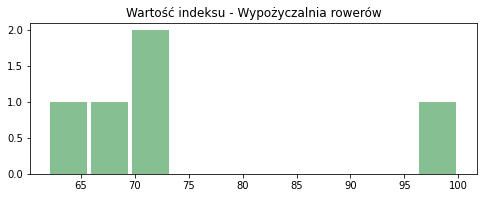

In [81]:
histWypozyczalnia = top5Wypozyczalnia.hist(bins=10, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)
histWypozyczalnia

# Indeks: Salon rowerowy

In [82]:
df_merged.columns.tolist()

['Nazwa',
 'Średnia ilość obiektów',
 'Ludność na 1 km2',
 'Ścieżki rowerowe',
 'Przeciętne wynagrodzenie',
 'Turystyczne obiekty noclegowe']

In [83]:
# all the following operations are analogous to those for bike rentals

weights = np.array([(1.5/10), (2.5/10), (2.5/10), (3.5/10), (0/10)])
print(weights)

[0.15 0.25 0.25 0.35 0.  ]


In [84]:
types = np.array([1, 1, 1, 1, 1])

In [85]:
topsis = mcdm_methods.TOPSIS()
result = topsis(matrix, weights, types)
result

array([0.1413411 , 0.12235145, 0.12028591, 0.07389078, 0.13611145,
       0.08705835, 0.08800366, 0.13684156, 0.12894815, 0.49131994,
       0.09807396, 0.06280309, 0.12469054, 0.14539762, 0.21521984,
       0.16353232, 0.17644357, 0.16688076, 0.10595035, 0.07079346,
       0.2503911 , 0.25293082, 0.09051369, 0.140208  , 0.15776081,
       0.19871519, 0.25456819, 0.50559288, 0.2700393 , 0.05048381,
       0.05954958, 0.16349084, 0.08484573, 0.14384625, 0.10633073,
       0.11815821, 0.03491936, 0.05330975, 0.07643312, 0.06145113,
       0.0477081 , 0.06096294, 0.1383777 , 0.12134926, 0.06065861,
       0.11104272, 0.07911772, 0.0571406 , 0.32024735, 0.21169113,
       0.30574673, 0.21334286, 0.06733851, 0.09509762, 0.06119322,
       0.08790207, 0.07482226, 0.08876671, 0.05611011, 0.08242311,
       0.09244032, 0.29882047, 0.04224322, 0.051439  , 0.0839775 ,
       0.18519026, 0.06831358, 0.07063459, 0.08550005, 0.07327449,
       0.04441929, 0.16441225, 0.22549868, 0.37436312, 0.28679

In [86]:
indexSalon = pd.DataFrame(result, columns=['Wartość indeksu']) 
indexSalon['Powiat']= df_merged['Nazwa'] 
cols = indexSalon.columns.tolist()
cols = cols[-1:] + cols[:-1]
indexSalon = indexSalon[cols]
indexSalon

,Powiat,Wartość indeksu
0,Powiat bolesławiecki,0.141341
1,Powiat dzierżoniowski,0.122351
2,Powiat głogowski,0.120286
3,Powiat górowski,0.073891
4,Powiat jaworski,0.136111
...,...,...
362,Powiat wałecki,0.107939
363,Powiat łobeski,0.109159
364,Powiat m.Koszalin,0.211194
365,Powiat m.Szczecin,0.313277


In [87]:
column = indexSalon['Wartość indeksu']
max = column.max()

In [88]:
column = indexSalon['Wartość indeksu']
min = column.min()

In [95]:
indexSalon["Wartość indeksu"] = (((indexSalon["Wartość indeksu"] - min)/(max - min))* 100).round(0).astype(int)
indexSalon = indexSalon.sort_values(by=["Wartość indeksu"], ascending=False)
indexSalon = indexSalon.reset_index()
indexSalon = indexSalon.drop(labels=['index'], axis='columns')

In [90]:
top5Salon = indexSalon.head(5)
top5Salon.index += 1 
top5Salon = top5Salon.rename(columns = {'Powiat': 'Powiat - Salon rowerowy', 'Wartość indeksu': 'Wartość indeksu - Salon rowerowy'}, inplace = False)
top5Salon

,Powiat - Salon rowerowy,Wartość indeksu - Salon rowerowy
1,Powiat m. st. Warszawa,100
2,Powiat m.Kraków,66
3,Powiat m.Wrocław,64
4,Powiat lubiński,62
5,Powiat m.Jastrzębie-Zdrój,61


array([[<AxesSubplot:title={'center':'Wartość indeksu - Salon rowerowy'}>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

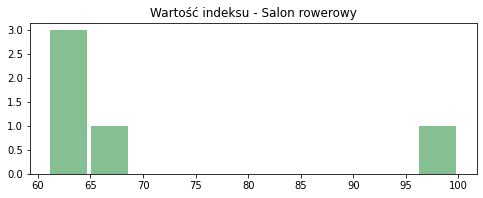

In [91]:
histSalon = top5Salon.hist(bins=10, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)
histSalon

# Zapis wyników do nowego pliku csv

In [92]:
# Creating a common table for both indexes

top5Wypozyczalnia['Ranking'] = top5Wypozyczalnia.index
top5Salon['Ranking'] = top5Salon.index

dfResults = pd.merge(top5Wypozyczalnia, top5Salon, on='Ranking')
dfResults = dfResults.set_index('Ranking')
dfResults


,Powiat - Wypożyczalnia rowerów,Wartość indeksu - Wypożyczalnia rowerów,Powiat - Salon rowerowy,Wartość indeksu - Salon rowerowy
Ranking,,,,
1,Powiat m. st. Warszawa,100,Powiat m. st. Warszawa,100
2,Powiat m.Kraków,73,Powiat m.Kraków,66
3,Powiat pucki,70,Powiat m.Wrocław,64
4,Powiat tatrzański,67,Powiat lubiński,62
5,Powiat m.Wrocław,62,Powiat m.Jastrzębie-Zdrój,61


In [93]:
# final visualization of the table with indexes

cm = sns.light_palette("green", as_cmap=True)

th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]


td_props = [
  ('font-size', '11px'),
  ('font-weight', 'bold'),
  ('color', '#000000'),  
  ]

styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

(dfWyniki.style
  .background_gradient(cmap=cm, subset=['Wartość indeksu - Wypożyczalnia rowerów','Wartość indeksu - Salon rowerowy'])
  .highlight_max(subset=['Wartość indeksu - Wypożyczalnia rowerów','Wartość indeksu - Salon rowerowy'])
  .set_table_styles(styles))

,Powiat - Wypożyczalnia rowerów,Wartość indeksu - Wypożyczalnia rowerów,Powiat - Salon rowerowy,Wartość indeksu - Salon rowerowy
Ranking,,,,
1,Powiat m. st. Warszawa,100,Powiat m. st. Warszawa,100
2,Powiat m.Kraków,73,Powiat m.Kraków,66
3,Powiat pucki,70,Powiat m.Wrocław,64
4,Powiat tatrzański,67,Powiat lubiński,62
5,Powiat m.Wrocław,62,Powiat m.Jastrzębie-Zdrój,61


In [94]:
dfResults.to_csv('wyniki.csv', sep='\t')